# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

# Constants

In [27]:
token_spam_prob_file = "SpamData/03_Testing/prob-spam.txt"
token_ham_prob_file = "SpamData/03_Testing/prob-nonspam.txt"
token_all_prob_file = "SpamData/03_Testing/prob-all-tokens-last.txt"

test_feature_matrix = "SpamData/03_Testing/test-features.txt"
test_target_file = "SpamData/03_Testing/test-target.txt"

vocab_size = 2500

# Load Data

In [28]:
#Features
X_test = np.loadtxt(test_feature_matrix, delimiter=' ')
#Target
y_test = np.loadtxt(test_target_file, delimiter=' ')
#Token Prob
prob_token_spam = np.loadtxt(token_spam_prob_file, delimiter=' ')
prob_token_ham = np.loadtxt(token_ham_prob_file, delimiter=' ')
prob_token_all = np.loadtxt(token_all_prob_file, delimiter=' ')

## Calculating the Joint Probability

Prior is a guess or belief about some quantity. 

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [29]:
prob_spam = 0.3116 #from training notebook

#Since we are working with very small numbers we can use log version of values

In [30]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(prob_spam)

In [31]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(1 - prob_spam)

In [32]:
joint_log_ham[:5]

array([-11.05063426, -36.94310619, -38.25679825,  -2.70364873,
       -60.15266519])

# Make Predictions

In [33]:
prediction = joint_log_spam > joint_log_ham

In [34]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [35]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Model Evaluation

In [36]:
correct_doc = (y_test == prediction).sum()
wrong_doc = X_test.shape[0] - correct_doc

accuracy = correct_doc / len(X_test)
print('Accuracy of model {:.2%}'.format(accuracy))

Accuracy of model 96.98%


We can simplyf

In [40]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(prob_spam)
joint_log_ham = X_test.dot(np.log(prob_token_ham) + np.log(1 - prob_spam))

Visualizing the Results

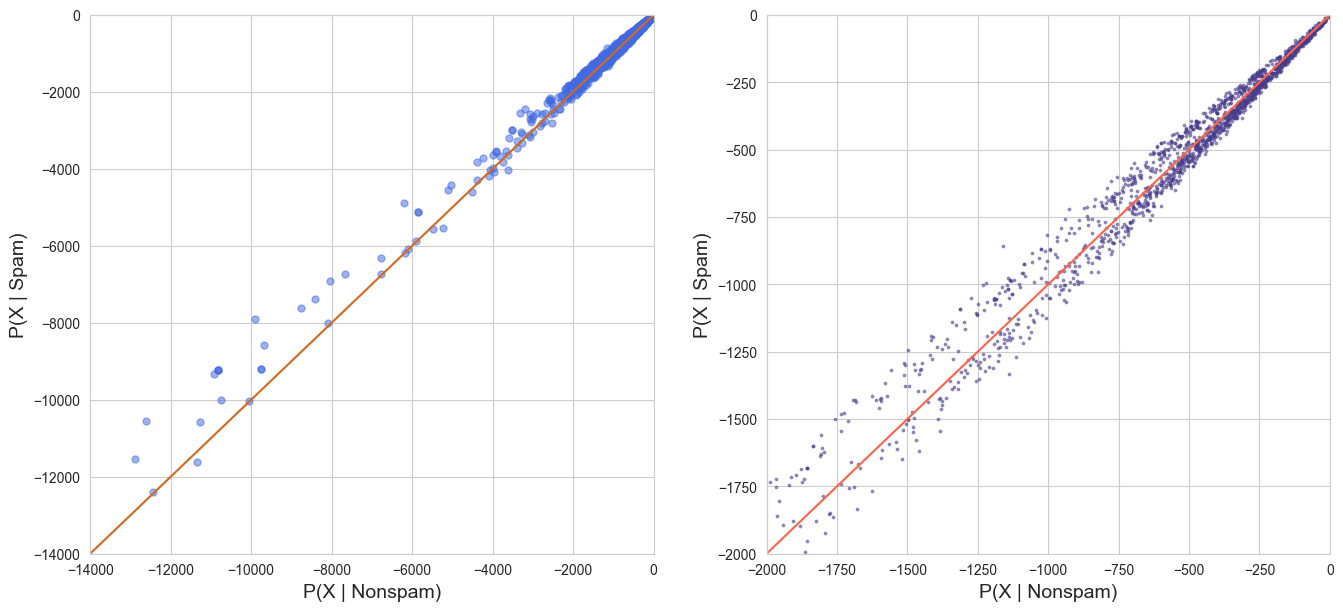

In [60]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

line_data = np.linspace(start=-14000, stop=1, num =1000) # for decision boundary

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='royalblue', alpha=0.5, s=25)
plt.plot(line_data, line_data, color='chocolate')

plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='darkslateblue', alpha=0.5, s=3)
plt.plot(line_data, line_data, color='tomato')

plt.show()

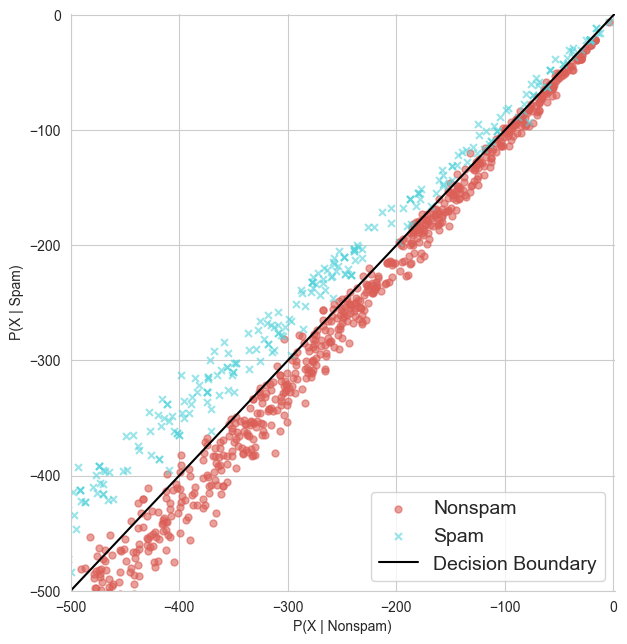

In [68]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                           labels: y_test})

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha':0.6, 's':25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(line_data,line_data, color='black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

In [70]:
np.unique(prediction, return_counts=True) # 1163 time predicted as NonSpam and 560 times predicted as Spam

(array([False,  True]), array([1163,  560]))

In [71]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

548

In [72]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

12

In [74]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

40

#### Recall (Sensivity) = T.P / (T.P + F.N)

In [78]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
recall_score

0.9319727891156463

#### Precision = T.P / (T.P + F.P)

In [79]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
precision_score

0.9785714285714285

#### F1-Score = (2*Precision*Recall)/(Precision + Recall)

In [80]:
f1_score = 2*(precision_score*recall_score) / (precision_score + recall_score)
f1_score

0.9547038327526133